In [1]:
# --- Import Libraries ---
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# --- Inisialisasi Variabel Berdasarkan NIM ---
a = 20
b = 23
c = 3
d = 12
e = 6

# --- Membuat Graf ---
G = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
G.add_nodes_from(nodes)

edges = [
    ('A', 'B', a),
    ('B', 'C', b),
    ('A', 'D', c),
    ('B', 'D', d),
    ('B', 'E', abs(d - e)),
    ('C', 'E', abs(b - e)),
    ('D', 'E', abs(d + b)),
    ('D', 'F', e),
    ('E', 'F', abs(c + e)),
    ('E', 'G', abs(d - e - a)),
    ('F', 'G', abs(c - e))
]
G.add_weighted_edges_from(edges)
pos = nx.spring_layout(G, seed=42)

# --- Minimum Spanning Tree: Prim ---
mst_prim = nx.minimum_spanning_tree(G, algorithm='prim')

# --- Dijkstra dari Node A ---
dijkstra_path = nx.single_source_dijkstra_path(G, source='A')
dijkstra_edges = []
for dest in dijkstra_path:
    path = dijkstra_path[dest]
    dijkstra_edges += list(zip(path[:-1], path[1:]))

# --- Minimum Spanning Tree: Kruskal ---
mst_kruskal = nx.minimum_spanning_tree(G, algorithm='kruskal')

# --- Minimum Spanning Tree: Sollin / Boruvka ---
parent = {n: n for n in G.nodes()}
rank = {n: 0 for n in G.nodes()}
def find(u):
    while parent[u] != u:
        parent[u] = parent[parent[u]]
        u = parent[u]
    return u
def union(u, v):
    ru, rv = find(u), find(v)
    if ru != rv:
        if rank[ru] < rank[rv]:
            parent[ru] = rv
        else:
            parent[rv] = ru
            if rank[ru] == rank[rv]:
                rank[ru] += 1
sol_edges = []
while len(set(find(n) for n in G.nodes())) > 1:
    cheapest = {}
    for u, v, d in G.edges(data=True):
        ru, rv = find(u), find(v)
        if ru != rv:
            if ru not in cheapest or d['weight'] < G[cheapest[ru][0]][cheapest[ru][1]]['weight']:
                cheapest[ru] = (u, v)
            if rv not in cheapest or d['weight'] < G[cheapest[rv][0]][cheapest[rv][1]]['weight']:
                cheapest[rv] = (u, v)
    for u, v in set(cheapest.values()):
        if find(u) != find(v):
            union(u, v)
            sol_edges.append((u, v, G[u][v]['weight']))

# --- Menyusun Tabel Hasil ---
df_result = pd.DataFrame({
    "Algoritma": ["Prim", "Kruskal", "Sollin", "Dijkstra"],
    "Total Bobot": [
        sum(G[u][v]['weight'] for u, v in mst_prim.edges()),
        sum(G[u][v]['weight'] for u, v in mst_kruskal.edges()),
        sum(w for u, v, w in sol_edges),
        sum(G[u][v]['weight'] for u, v in set(dijkstra_edges))
    ]
})

print(df_result)


  Algoritma  Total Bobot
0      Prim           44
1   Kruskal           44
2    Sollin           44
3  Dijkstra           50


MINIMUM SPINNING TREE

VERSI 2

In [2]:
# Full Python Program for MST & Visualization with Given NIM and Graph Structure

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import animation
from IPython.display import HTML


In [3]:
# --- STEP 1: Set up values from NIM ---
a = 20
b = 23
c = 3
d = 12
e = 6

In [4]:
# --- STEP 2: Build the graph according to the image ---
edges = [
    ("A", "B", a),
    ("B", "C", b),
    ("A", "D", c),
    ("B", "D", d),
    ("B", "E", abs(d - e)),
    ("C", "E", abs(b - e)),
    ("D", "E", abs(d + b)),
    ("D", "F", e),
    ("E", "F", abs(c + e)),
    ("E", "G", abs(d - e - a)),
    ("F", "G", abs(c - e)),
]

coords = {
    "A": (2, 6),
    "B": (4, 8),
    "C": (6, 9),
    "D": (3, 4),
    "E": (6, 5),
    "F": (8, 3),
    "G": (10, 6)
}

G = nx.Graph()
G.add_weighted_edges_from(edges)


In [5]:
# --- STEP 3: Define functions for MST animation ---
def animate_mst_building(G, mst_edges, pos, title="Animasi MST"):
    fig, ax = plt.subplots(figsize=(6, 4))
    nx.draw_networkx_nodes(G, pos, ax=ax, node_color='skyblue', node_size=800)
    nx.draw_networkx_labels(G, pos, ax=ax)
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color='lightgray', style='dotted')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
    ax.set_title(title)
    ax.axis('off')

    def update(i):
        ax.clear()
        nx.draw_networkx_nodes(G, pos, ax=ax, node_color='skyblue', node_size=800)
        nx.draw_networkx_labels(G, pos, ax=ax)
        nx.draw_networkx_edges(G, pos, ax=ax, edge_color='lightgray', style='dotted')
        nx.draw_networkx_edges(G, pos, edgelist=mst_edges[:i+1], edge_color='green', width=3)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
        ax.set_title(f"{title} - Edge {i+1}")
        ax.axis('off')

    ani = animation.FuncAnimation(fig, update, frames=len(mst_edges), interval=800, repeat=False)
    plt.close(fig)
    return HTML(ani.to_jshtml())

# --- STEP 4: Calculate MST with 3 Algorithms ---

In [6]:
# Kruskal
mst_kruskal = nx.minimum_spanning_tree(G, algorithm='kruskal')
kruskal_edges = list(mst_kruskal.edges(data='weight'))
total_kruskal = sum([w for _, _, w in kruskal_edges])

In [7]:
# Prim
mst_prim = nx.minimum_spanning_tree(G, algorithm='prim')
prim_edges = list(mst_prim.edges(data='weight'))
total_prim = sum([w for _, _, w in prim_edges])

In [8]:
# Sollin (Boruvka)
parent = {node: node for node in G.nodes()}
rank = {node: 0 for node in G.nodes()}
def find(u):
    if parent[u] != u:
        parent[u] = find(parent[u])
    return parent[u]
def union(u, v):
    ru, rv = find(u), find(v)
    if ru != rv:
        if rank[ru] < rank[rv]:
            parent[ru] = rv
        else:
            parent[rv] = ru
            if rank[ru] == rank[rv]:
                rank[ru] += 1

sollin_edges = []
while len(set(find(n) for n in G.nodes())) > 1:
    cheapest = {}
    for u, v, d in G.edges(data=True):
        ru, rv = find(u), find(v)
        if ru != rv:
            if ru not in cheapest or d['weight'] < G[cheapest[ru][0]][cheapest[ru][1]]['weight']:
                cheapest[ru] = (u, v)
            if rv not in cheapest or d['weight'] < G[cheapest[rv][0]][cheapest[rv][1]]['weight']:
                cheapest[rv] = (u, v)
    for u, v in set(cheapest.values()):
        if find(u) != find(v):
            union(u, v)
            sollin_edges.append((u, v, G[u][v]['weight']))
total_sollin = sum([w for _, _, w in sollin_edges])


In [9]:
# --- STEP 5: Dijkstra from A ---
dijkstra_path = nx.single_source_dijkstra_path(G, "A")
dijkstra_edges = []
for dest in dijkstra_path:
    path = dijkstra_path[dest]
    dijkstra_edges += list(zip(path[:-1], path[1:]))
dijkstra_edges = list(set(dijkstra_edges))  # remove duplicates
total_dijkstra = sum(G[u][v]['weight'] for u, v in dijkstra_edges)


In [10]:
# Save data for visualization
mst_results = {
    "Kruskal": {"edges": kruskal_edges, "total": total_kruskal},
    "Prim": {"edges": prim_edges, "total": total_prim},
    "Sollin": {"edges": sollin_edges, "total": total_sollin},
    "Dijkstra": {"edges": dijkstra_edges, "total": total_dijkstra}
}

mst_results

{'Kruskal': {'edges': [('A', 'D', 3),
   ('B', 'E', 6),
   ('C', 'E', 17),
   ('D', 'F', 6),
   ('E', 'F', 9),
   ('F', 'G', 3)],
  'total': 44},
 'Prim': {'edges': [('A', 'D', 3),
   ('B', 'E', 6),
   ('C', 'E', 17),
   ('D', 'F', 6),
   ('E', 'F', 9),
   ('F', 'G', 3)],
  'total': 44},
 'Sollin': {'edges': [('F', 'G', 3),
   ('C', 'E', 17),
   ('B', 'E', 6),
   ('A', 'D', 3),
   ('E', 'F', 9),
   ('D', 'F', 6)],
  'total': 44},
 'Dijkstra': {'edges': [('F', 'E'),
   ('D', 'F'),
   ('A', 'D'),
   ('D', 'B'),
   ('E', 'C'),
   ('F', 'G')],
  'total': 50}}

versi 3


C:\Users\HAFIZ\AppData\Local\Temp\ipykernel_12032\3835339872.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Atur area agar tidak tabrakan


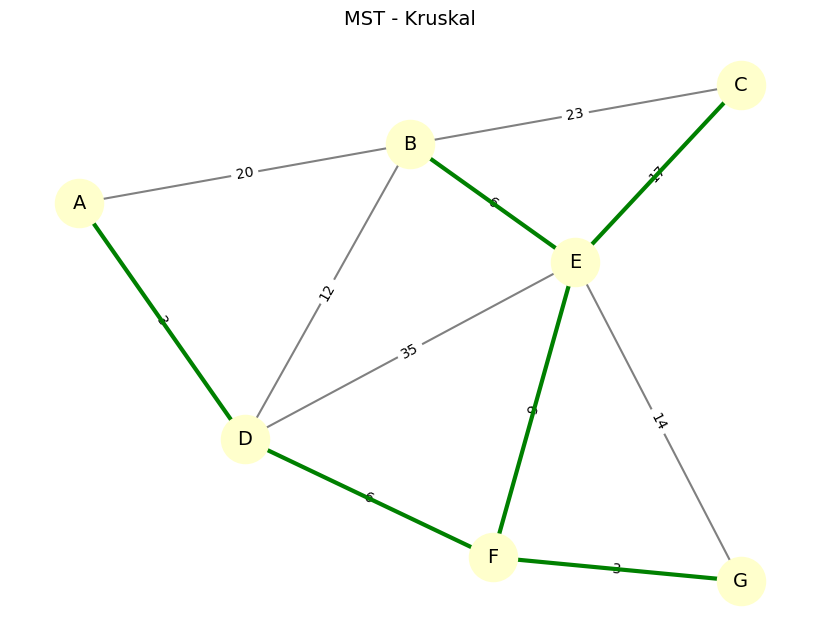

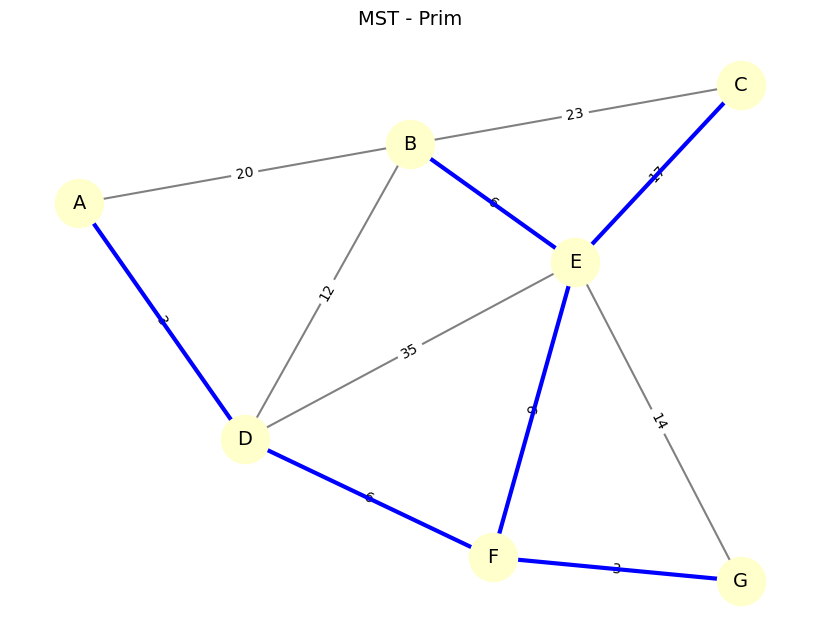

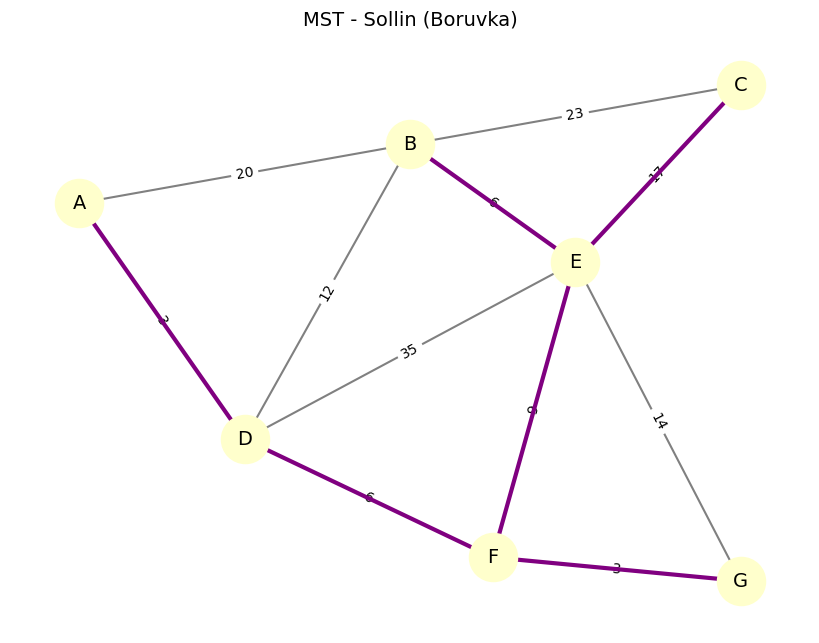

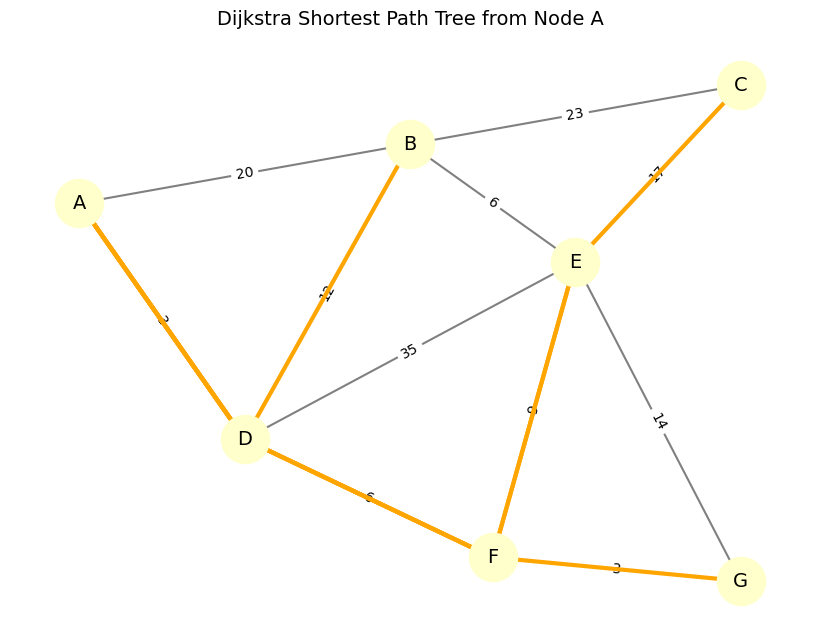

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# NIM: 202331206 → variabel:
a, b, c, d, e = 20, 23, 3, 12, 6

# Edges dari soal dengan bobot sesuai ekspresi
edges = [
    ("A", "B", a),
    ("B", "C", b),
    ("A", "D", c),
    ("B", "D", d),
    ("B", "E", abs(d - e)),
    ("C", "E", abs(b - e)),
    ("D", "E", abs(d + b)),
    ("D", "F", e),
    ("E", "F", abs(c + e)),
    ("E", "G", abs(d - e - a)),
    ("F", "G", abs(c - e))
]

# Posisi layout sesuai gambar manual
pos = {
    "A": (0, 2),
    "B": (2, 2.5),
    "C": (4, 3),
    "D": (1, 0),
    "E": (3, 1.5),
    "F": (2.5, -1),
    "G": (4, -1.2)
}

# Fungsi visualisasi
def plot_graph_with_highlight(title, edges_highlighted, color, G):
    plt.figure(figsize=(8, 6))
    edge_labels = nx.get_edge_attributes(G, 'weight')
    
    # Semua edge: hitam tipis
    nx.draw(G, pos, with_labels=True, node_color="#ffffcc", node_size=1200, font_size=14, edge_color='gray', width=1.5)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=10)
    
    # Edge hasil algoritma: tebal dan berwarna
    nx.draw_networkx_edges(G, pos, edgelist=edges_highlighted, edge_color=color, width=3)
    
    plt.title(title, fontsize=14)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Atur area agar tidak tabrakan
    plt.show()

# Buat graf utama
G = nx.Graph()
G.add_weighted_edges_from(edges)

# --- KRUSKAL ---
kruskal_mst = nx.minimum_spanning_tree(G, algorithm="kruskal")
plot_graph_with_highlight("MST - Kruskal", kruskal_mst.edges(), "green", G)

# --- PRIM ---
prim_mst = nx.minimum_spanning_tree(G, algorithm="prim")
plot_graph_with_highlight("MST - Prim", prim_mst.edges(), "blue", G)

# --- SOLLIN (BORUVKA) ---
parent = {n: n for n in G.nodes()}
rank = {n: 0 for n in G.nodes()}
def find(u):
    while parent[u] != u:
        parent[u] = parent[parent[u]]
        u = parent[u]
    return u
def union(u, v):
    u_root, v_root = find(u), find(v)
    if u_root == v_root: return
    if rank[u_root] < rank[v_root]:
        parent[u_root] = v_root
    else:
        parent[v_root] = u_root
        if rank[u_root] == rank[v_root]:
            rank[u_root] += 1
sollin_edges = []
while len(set(find(n) for n in G.nodes())) > 1:
    cheapest = {}
    for u, v, data in G.edges(data=True):
        ru, rv = find(u), find(v)
        if ru != rv:
            if ru not in cheapest or data['weight'] < G[cheapest[ru][0]][cheapest[ru][1]]['weight']:
                cheapest[ru] = (u, v)
            if rv not in cheapest or data['weight'] < G[cheapest[rv][0]][cheapest[rv][1]]['weight']:
                cheapest[rv] = (u, v)
    for u, v in set(cheapest.values()):
        if find(u) != find(v):
            union(u, v)
            sollin_edges.append((u, v))
plot_graph_with_highlight("MST - Sollin (Boruvka)", sollin_edges, "purple", G)

# --- DIJKSTRA dari A ---
dijkstra_path = nx.single_source_dijkstra_path(G, source="A")
dijkstra_edges = []
for dest in dijkstra_path:
    path = dijkstra_path[dest]
    dijkstra_edges += list(zip(path[:-1], path[1:]))
plot_graph_with_highlight("Dijkstra Shortest Path Tree from Node A", dijkstra_edges, "orange", G)

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

def animate_mst_building_interactive(G, mst_edges, pos, title="Animasi Proses MST"):
    fig, ax = plt.subplots(figsize=(6, 4))
    
    labels = nx.get_edge_attributes(G, 'weight')
    
    # Gambar node dan semua edge abu-abu
    def draw_base():
        ax.clear()
        nx.draw_networkx_nodes(G, pos, ax=ax, node_color='lightblue', node_size=800)
        nx.draw_networkx_labels(G, pos, ax=ax)
        nx.draw_networkx_edges(G, pos, ax=ax, edge_color='lightgray', style='dotted')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
        ax.set_title(title)
        ax.axis('on')
        ax.grid(True)
        ax.set_axisbelow(True)
    
    def update(i):
        draw_base()
        nx.draw_networkx_edges(G, pos, edgelist=mst_edges[:i+1], edge_color='green', width=2.5, ax=ax)
        ax.set_title(f"{title} - Edge ke-{i+1} / {len(mst_edges)}")
        return ax,
    
    ani = animation.FuncAnimation(fig, update, frames=len(mst_edges), interval=1000, repeat=True)
    plt.close(fig)
    return HTML(ani.to_jshtml())

# Misal kamu sudah punya graph G, dan list MST edges:
mst_kruskal = list(nx.minimum_spanning_edges(G, algorithm='kruskal'))
edges_kruskal = [(u, v) for u, v, w in mst_kruskal]

# Ambil posisi tetap
pos = nx.spring_layout(G, seed=42)

# Tampilkan animasi interaktif
animate_mst_building_interactive(G, edges_kruskal, pos, title="MST Kruskal")
